In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn
from keras.datasets import cifar10

In [34]:
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

In [3]:
#0. Airplanes
#1. Cars
#2. Birds
#3. Cats
#4. Deers
#5. Dogs
#6. Frogs
#7. Horses
#8. Ships
#9. Trucks

In [35]:
X_train.shape

(50000, 32, 32, 3)

In [5]:
#50,000 images, each image consists 32x32 and 3 channels

In [36]:
X_train.shape

(50000, 32, 32, 3)

In [6]:
X_test.shape

(10000, 32, 32, 3)

In [7]:
y_train.shape

(50000, 1)

In [8]:
y_test.shape

(10000, 1)

In [9]:
#Data Visualization

[0]


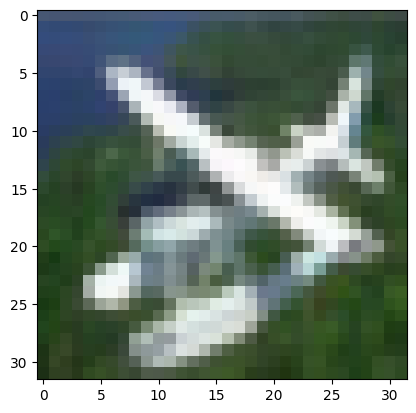

In [10]:
i = 2345
plt.imshow(X_train[i])
print(y_train[i]) #x represents the image, y represents the class

In [11]:
W_grid = 15

In [12]:
L_grid = 15

/opt/anaconda3/envs/tf_env/lib/python3.8/site-packages/matplotlib/text.py:1279: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


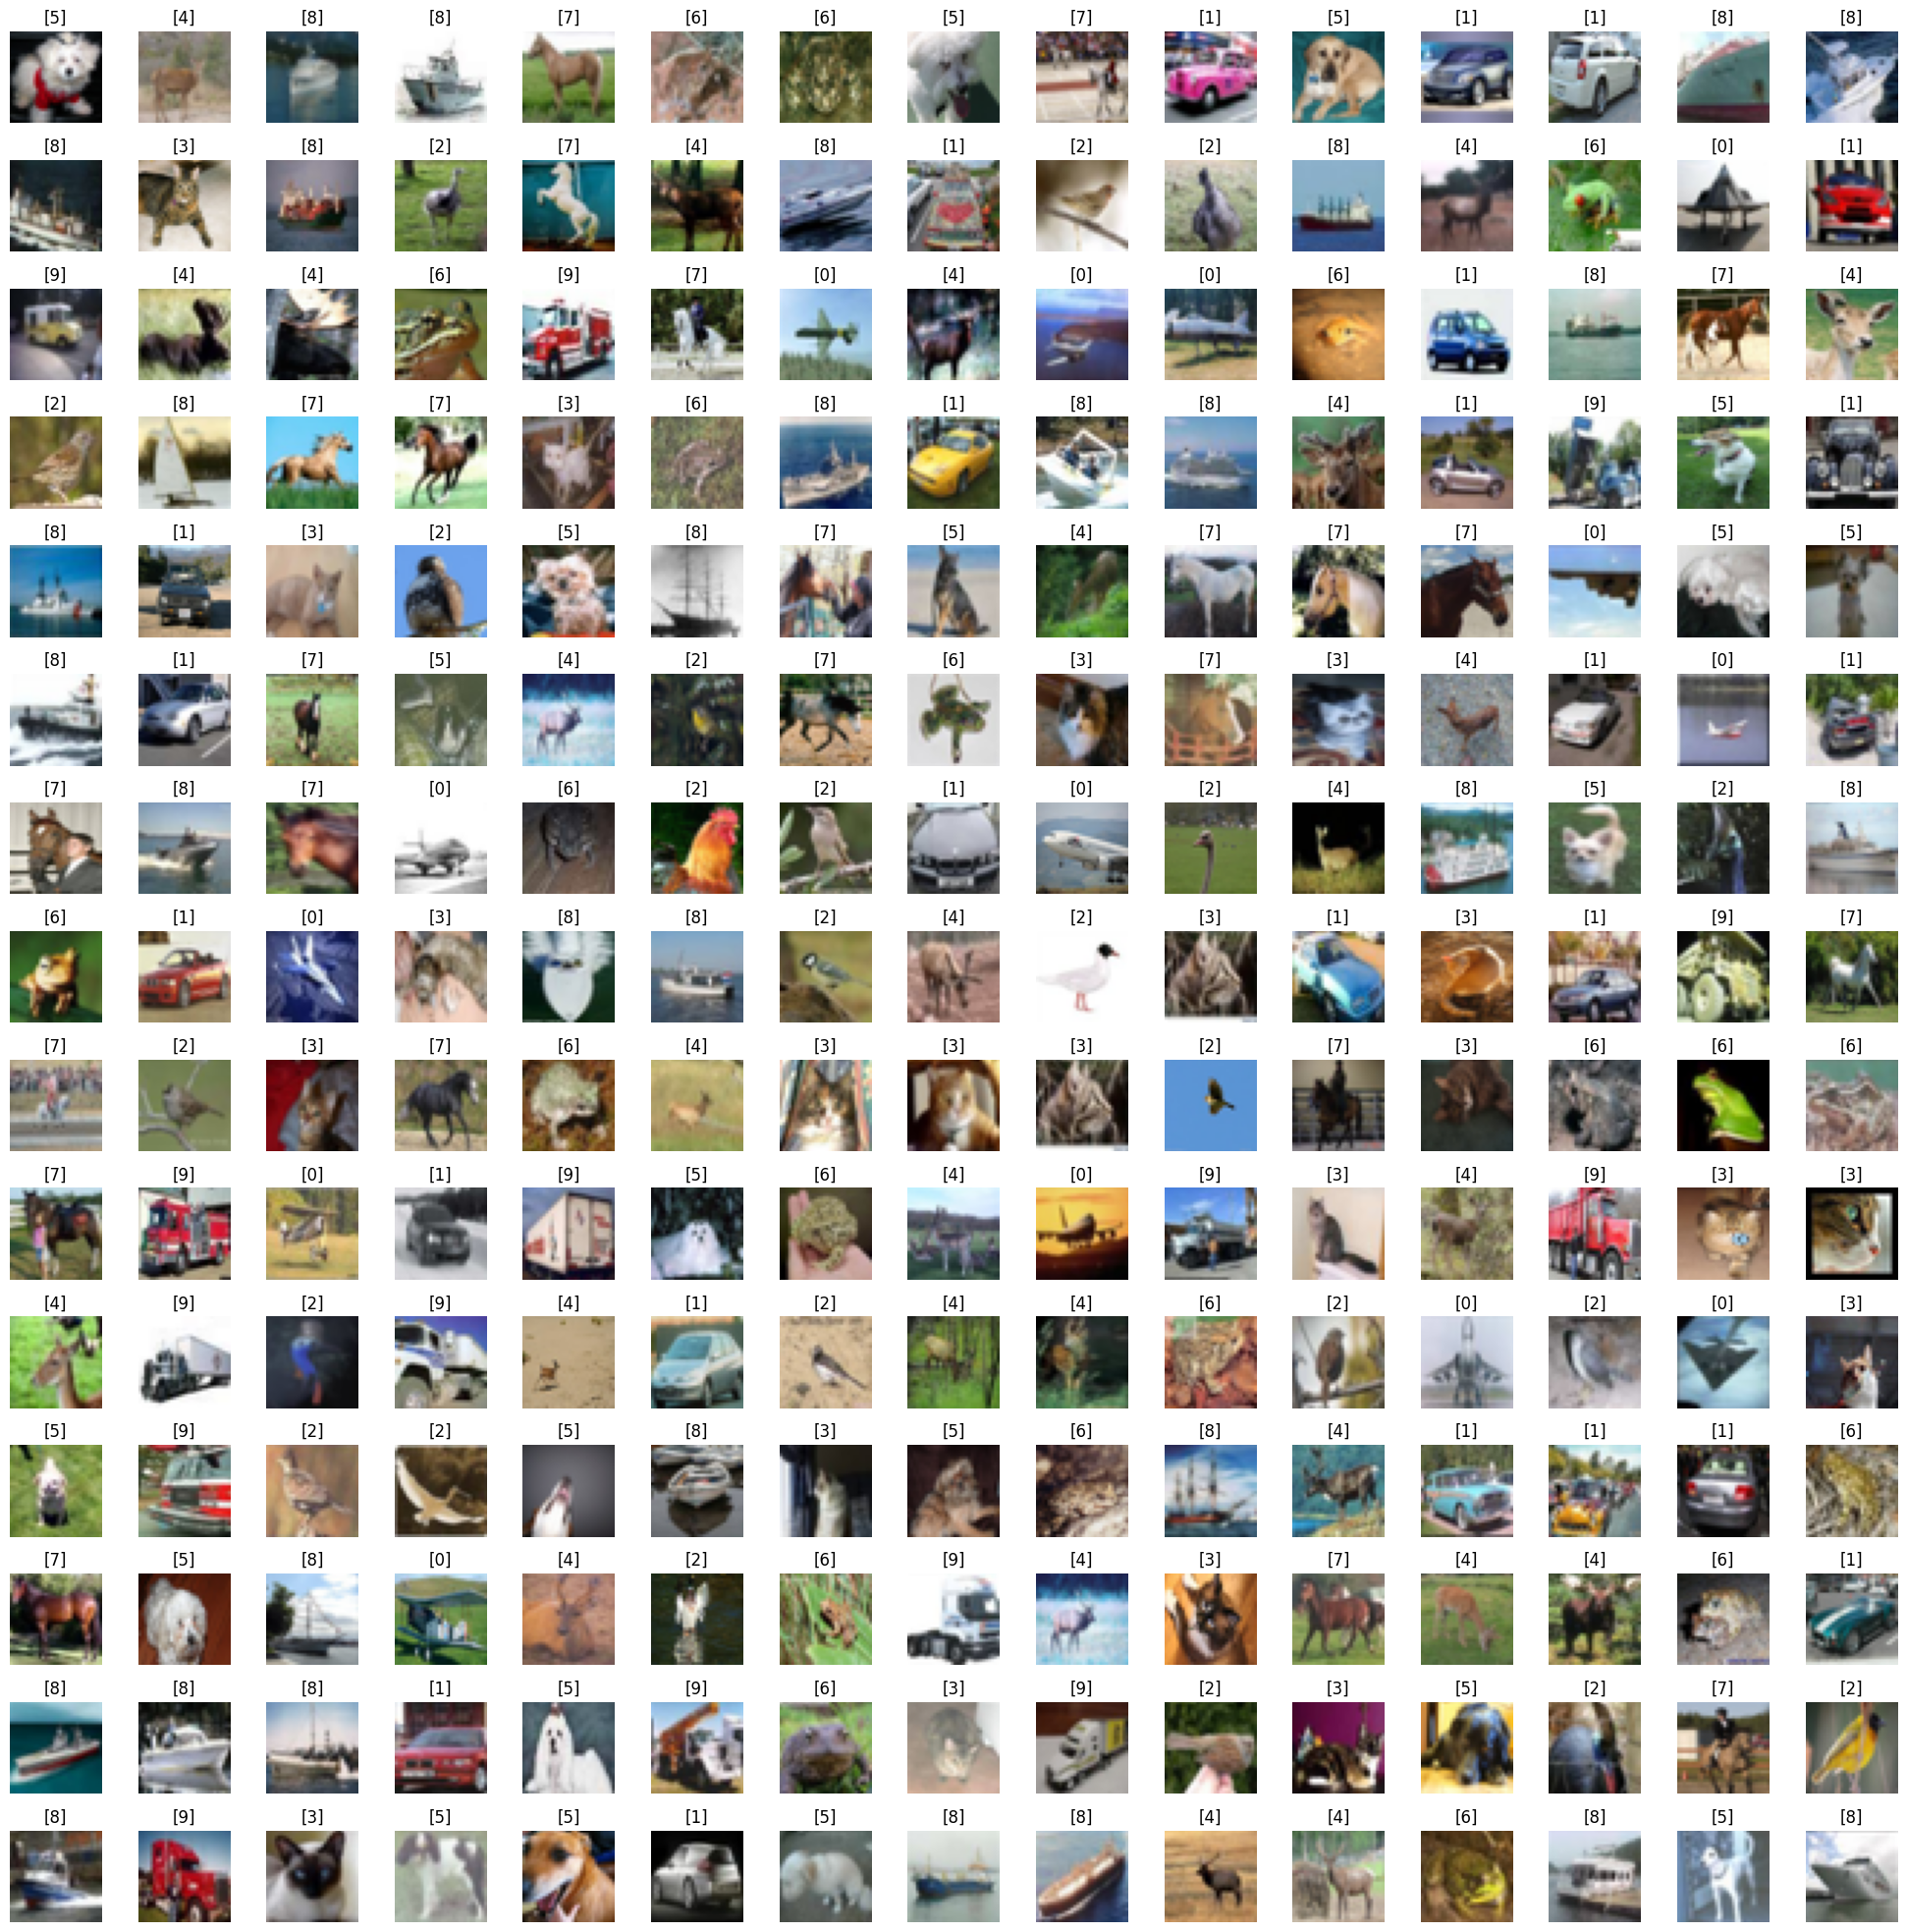

In [13]:
fig, axes = plt.subplots(L_grid, W_grid, figsize = (25, 25))
axes = axes.ravel()

n_training = len(X_train)

for x in np.arange(0, L_grid * W_grid): # Adding a random image in each cell in the 15x15 grid
    index = np.random.randint(0, n_training) # Picking a random number
    axes[x].imshow(X_train[index])
    axes[x].set_title(y_train[index])
    axes[x].axis('off')
plt.subplots_adjust(hspace = 0.4)

In [14]:
n_training

50000

In [15]:
# Data preparation

In [30]:
X_train = X_train.astype('float32')
X_train = X_test.astype('float32')

(10000, 32, 32, 3)

In [41]:
number_cat = 10

In [42]:
import keras
y_train = keras.utils.to_categorical(y_train, number_cat)
y_test = keras.utils.to_categorical(y_test, number_cat)

In [43]:
X_train = X_train/255.0 # Data normalization
X_test = X_test/255.0

In [44]:
X_train.shape

(50000, 32, 32, 3)

In [45]:
Input_shape = X_train.shape[1:]

In [46]:
Input_shape


(32, 32, 3)

In [47]:
# training the model
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, AveragePooling2D, Dense, Flatten, Dropout
from keras.optimizers import Adam
from keras.callbacks import TensorBoard 

#Keras flow as the API and tensorflow as the backend

In [48]:
cnn_model = Sequential()
cnn_model.add(Conv2D(filters = 32, kernel_size = (3, 3), activation = "relu", input_shape = Input_shape)) #feature detection, applying filter
cnn_model.add(Conv2D(filters = 32, kernel_size = (3, 3), activation = "relu")) #Adding convolutional layers
cnn_model.add(MaxPooling2D(2,2)) #maxpooling
cnn_model.add(Dropout(0.4)) #dropping out for efficiency


cnn_model.add(Conv2D(filters = 64, kernel_size = (3, 3), activation = "relu")) #feature detection, applying filter
cnn_model.add(Conv2D(filters = 64, kernel_size = (3, 3), activation = "relu"))
cnn_model.add(MaxPooling2D(2,2)) #maxpooling
cnn_model.add(Dropout(0.4)) 

cnn_model.add(Flatten())

cnn_model.add(Dense(units=512, activation='relu'))

cnn_model.add(Dense(units=512, activation='relu'))

cnn_model.add(Dense(units=10, activation='softmax'))

In [54]:
cnn_model.compile(
    loss='categorical_crossentropy',
    optimizer= keras.optimizers.legacy.RMSprop(learning_rate=0.001),
    metrics=['accuracy']
)

In [ ]:

history = cnn_model.fit(X_train, y_train, batch_size=16, epochs=2, shuffle=True)

Epoch 1/2
3125/3125 [==============================] - 40s 13ms/step - loss: 1.1412 - accuracy: 0.6211
Epoch 2/2
 696/3125 [=====>........................] - ETA: 31s - loss: 1.1596 - accuracy: 0.6233